## Imports and Setup

In [1]:
import os 
os.chdir('../')
import yaml
import numpy as np
import geopandas as gpd
from utils import data_annotator

%load_ext autoreload
%autoreload 2

## Parameters

In [85]:
iso_code = "VCT"
mode = "aerial"

config_file = f"configs/config.yaml"
with open(config_file, 'r') as stream:
    config = yaml.safe_load(stream)
    
config["path_to_file"] = "data/{mode}/vector/{iso_code}/tiles_{iso_code}.geojson"
labels = config[mode]
path_to_images = config['path_to_images'].format(mode=mode, iso_code=iso_code)
path_to_embeddings = config['path_to_embeddings'].format(mode=mode, iso_code=iso_code)
path_to_file = config['path_to_file'].format(mode=mode, iso_code=iso_code)

## Interactive Annotation

In [90]:
da = data_annotator.DataAnnotator(labels, path_to_images, path_to_file, path_to_embeddings, mode=mode, index=4647) 
da.widget

MulticlassLabeller(children=(HTML(value='<h2 style="text-align:center;">5692_793.tif <br> Index: 4647</h2><h3 …

In [88]:
da.end_timer()

INFO:root:Elapsed time: 0:03:38.668333
INFO:root:Annotation rate: 109.33 seconds per annotation
INFO:root:Total annotations for this session: 2


## Visualize Annotations

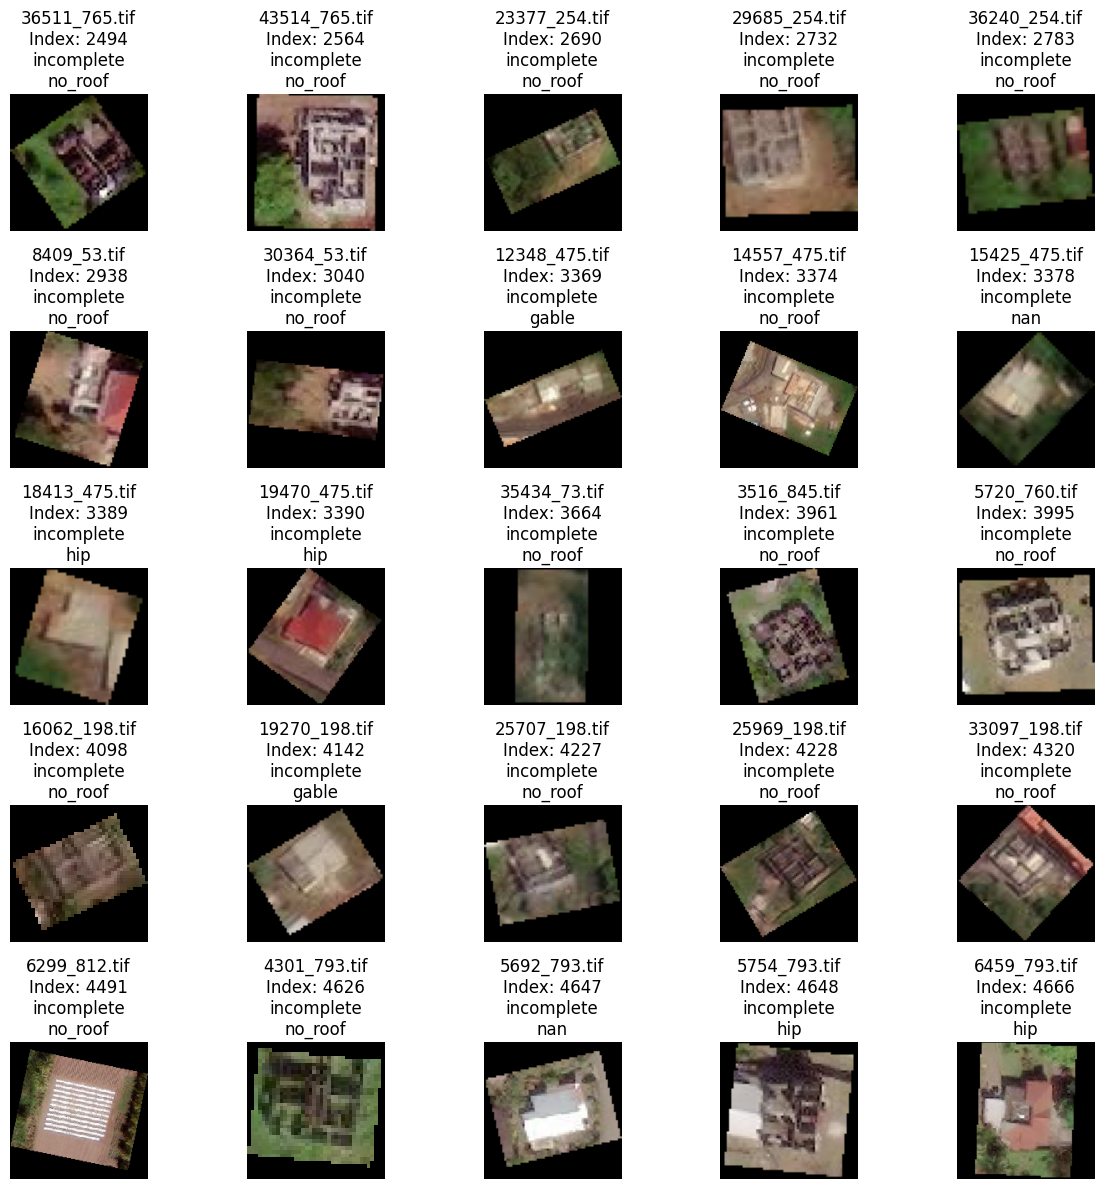

In [89]:
#da.visualize_annotations(index=0, randomize=True)

# To show only hipped buildings, uncomment the following:
da.visualize_annotations(index=25, query="roof_material == 'incomplete'")
#da.visualize_annotations(index=125, query="(roof_pitch == 'flat')")
#da.visualize_annotations(index=0, query="duplicate == True", show_clean_only=False)

## Vector Search

In [ ]:
da.vector_search(query_index=2582, n=50, model_name="ResNet50_FMOW_RGB_GASSL", exclude_annotated=True)

## Show raw data

In [67]:
data = gpd.read_file(path_to_file).replace('nan', np.nan).dropna()
data = data[(data.duplicate == False) & (data.clean == True)]
data.loc[data.roof_material == "tarpaulin", "roof_material"] = "irregular_metal"
data.loc[data.roof_material == "tile", "roof_material"] = "healthy_metal"
print(f"Total annotated: {data.shape[0]}")
for label in labels:
    print(data[label].value_counts())
data.head(3)

Total annotated: 3232
roof_material
healthy_metal      2334
concrete/cement     438
irregular_metal     305
incomplete          155
Name: count, dtype: int64
roof_pitch
gable      1702
hip         900
flat        492
no_roof     138
Name: count, dtype: int64


,UID,ghsl_smod,rurban,grid_id,filename,annotated,roof_material,roof_pitch,clean,duplicate,geometry
0,5,13,rural,238,5_238.tif,True,healthy_metal,gable,True,False,"POLYGON ((-61.2389 13.28349, -61.2389 13.28358..."
2,120,13,rural,238,120_238.tif,True,healthy_metal,gable,True,False,"POLYGON ((-61.2372 13.28367, -61.23717 13.2835..."
7,322,13,rural,238,322_238.tif,True,healthy_metal,hip,True,False,"POLYGON ((-61.23861 13.2851, -61.23858 13.2850..."


In [59]:
data.to_file(f"data/aerial/vector/{iso_code}/train_{iso_code}.geojson", driver="GeoJSON")

INFO:pyogrio._io:Created 3,233 records
